## 基礎題 - 算出斜率w與截距b

y = wx + b

記得計算前X須符合資料格式
$$[x_1, x_2, \ldots, x_{50}]$$

==> 

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])

斜率 w = 1.6170185212611565
截距 b = 0.27312968949421795


C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36852 (\N{CJK UNIFIED IDEOGRAPH-8FF4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27512 (\N{CJK UNIFIED IDEOGRAPH-6B78}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig.ca

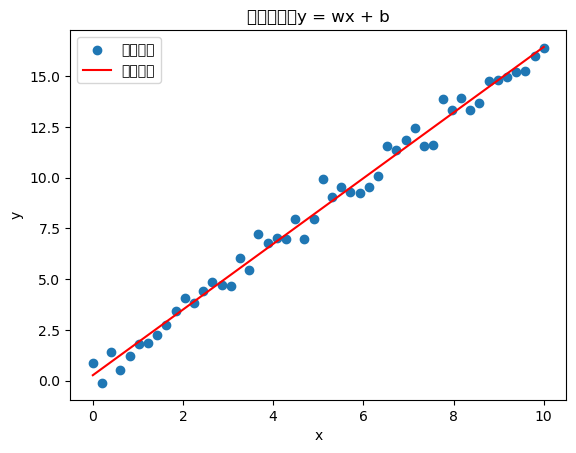

In [4]:
w, b = np.polyfit(x, y, 1)

print(f"斜率 w = {w}")
print(f"截距 b = {b}")

# 繪圖
plt.scatter(x, y, label="原始資料")
plt.plot(x, w * x + b, color='red', label="線性擬合")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("線性迴歸：y = wx + b")
plt.show()

## 進階題 - 切割資料集分別做訓練與預測(訓練資料80%、測試資料20%)


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])


斜率 w: 1.616829563231608
截距 b: 0.22835228264986185


C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27512 (\N{CJK UNIFIED IDEOGRAPH-6B78}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from font(s) DejaVu San

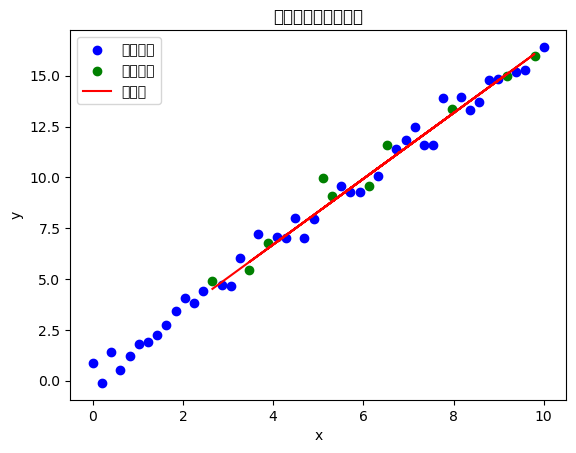

In [6]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# 訓練資料與測試資料切分 (80/20)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 線性迴歸訓練
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

# 預測
y_pred = model.predict(x_test)

# 印出結果
print(f"斜率 w: {model.coef_[0][0]}")
print(f"截距 b: {model.intercept_[0]}")

# 畫圖顯示
plt.scatter(x_train, y_train, color='blue', label='訓練資料')
plt.scatter(x_test, y_test, color='green', label='測試資料')
plt.plot(x_test, y_pred, color='red', label='預測線')
plt.xlabel('x')
plt.ylabel('y')
plt.title('線性回歸訓練與測試')
plt.legend()
plt.show()

## 用訓練資料來 fit 函數
1. 只用訓練資料集的資料進行linear regression演算法<br>
2. 並計算出訓練階段的MSE
3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_train.PNG)

訓練集的 MSE = 1.0940


C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27512 (\N{CJK UNIFIED IDEOGRAPH-6B78}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from font(s) DejaVu San

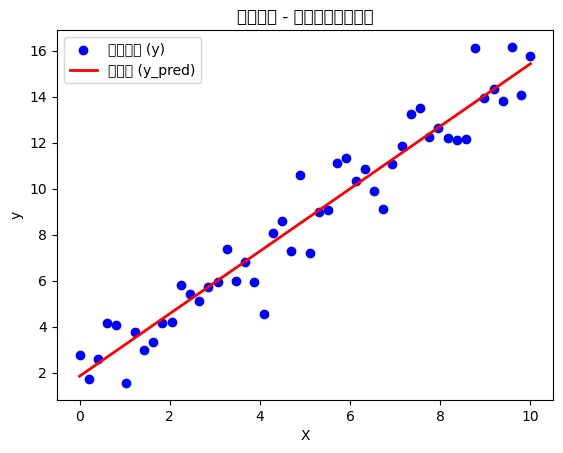

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. 產生訓練資料 (這裡隨機產生一些接近線性關係的資料)
np.random.seed(0)
X = np.linspace(0, 10, 50).reshape(-1, 1)   # 自變數
y = 1.5 * X.flatten() + 1 + np.random.randn(50) * 1.0   # 目標值，加上隨機誤差

# 2. 建立線性回歸模型並訓練 (fit)
model = LinearRegression()
model.fit(X, y)

# 3. 預測
y_pred = model.predict(X)

# 4. 計算訓練集的 MSE
mse = mean_squared_error(y, y_pred)
print(f"訓練集的 MSE = {mse:.4f}")

# 5. 畫圖：藍色是真實資料，紅色是模型預測線
plt.scatter(X, y, color="blue", label="真實資料 (y)")
plt.plot(X, y_pred, color="red", linewidth=2, label="預測值 (y_pred)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("線性回歸 - 訓練資料擬合結果")
plt.legend()
plt.show()

## 將訓練出來的函數預測測試集的X值
1. 使用剛剛訓練出來的模型進行測試資料集的資料預測*注意reshape<br>
使用X = 2.44897959，預測出來數值應該為 4.3025375<br>
所有測試集資料
$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 假設模型已經訓練好了
# model.fit(X_train, y_train)

# 單一測試值
x_test = np.array([[2.44897959]])  # 注意 reshape 成 (1, 1)

# 用模型預測
y_pred = model.predict(x_test)
print(f"輸入 X = {x_test.flatten()[0]}，預測結果 = {y_pred[0]}")

輸入 X = 2.44897959，預測結果 = [3.75741087]


2. 並計算出測試階段的MSE

訓練集 MSE = 1.1945
測試集 MSE = 0.7957


C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27512 (\N{CJK UNIFIED IDEOGRAPH-6B78}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig.ca

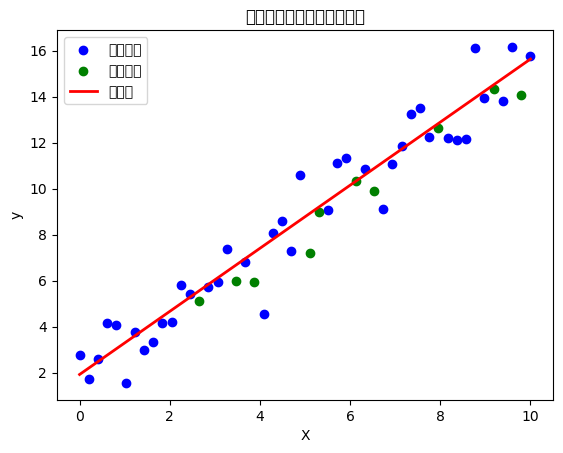

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. 產生資料
np.random.seed(0)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 1.5 * X.flatten() + 1 + np.random.randn(50) * 1.0

# 2. 切分成訓練集 & 測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 訓練模型
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 計算訓練 & 測試 MSE
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"訓練集 MSE = {mse_train:.4f}")
print(f"測試集 MSE = {mse_test:.4f}")

# 5. 畫圖
plt.scatter(X_train, y_train, color="blue", label="訓練資料")
plt.scatter(X_test, y_test, color="green", label="測試資料")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="迴歸線")
plt.xlabel("X")
plt.ylabel("y")
plt.title("線性回歸：訓練集與測試集")
plt.legend()
plt.show()

3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_test.PNG)

訓練集 MSE = 1.1945


C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 40670 (\N{CJK UNIFIED IDEOGRAPH-9EDE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 34253 (\N{CJK UNIFIED IDEOGRAPH-85CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ellis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33287 (\N{CJK UNIFIED IDEOGRAPH-8207}) missing from font(s) DejaVu San

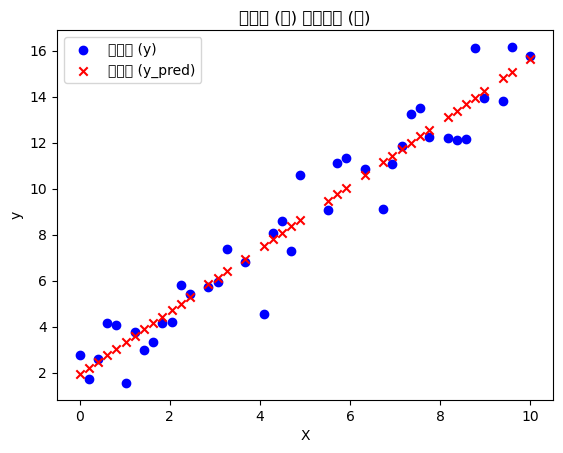

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. 產生資料
np.random.seed(0)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 1.5 * X.flatten() + 1 + np.random.randn(50) * 1.0

# 2. 切分訓練 / 測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 訓練模型
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 計算預測值
y_train_pred = model.predict(X_train)

# 5. 計算 MSE
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"訓練集 MSE = {mse_train:.4f}")

# 6. 畫圖：藍色=目標值，紅色=預測值
plt.scatter(X_train, y_train, color="blue", label="真實值 (y)")
plt.scatter(X_train, y_train_pred, color="red", label="預測值 (y_pred)", marker="x")

plt.xlabel("X")
plt.ylabel("y")
plt.title("目標點 (藍) 與預測點 (紅)")
plt.legend()
plt.show()